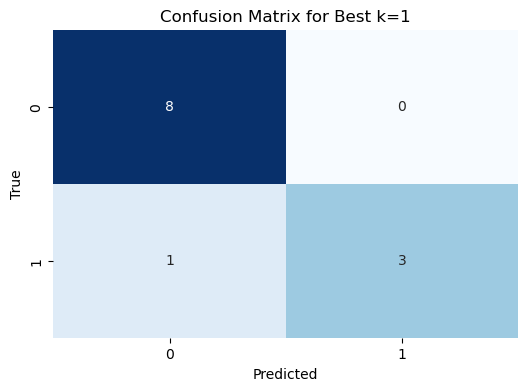

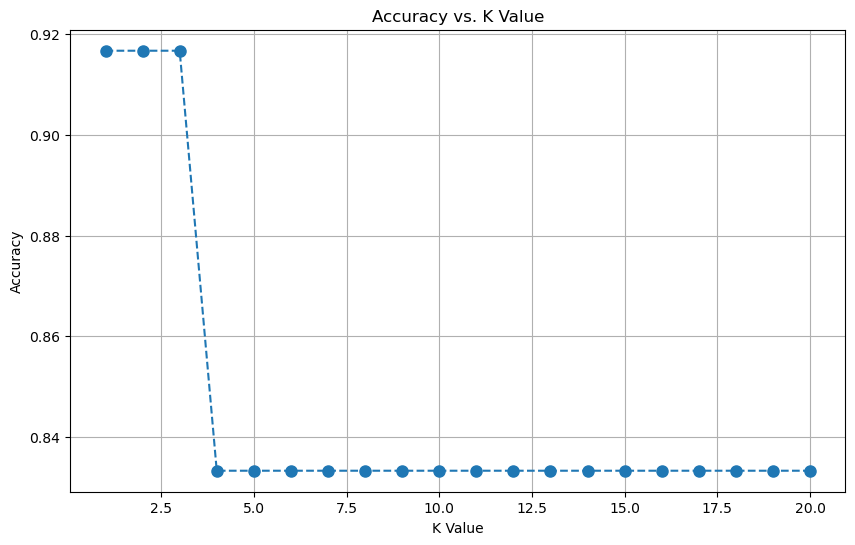

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load the dataset from a CSV file
data = pd.read_csv("lungcancer.csv")

# Remove unnecessary attributes (Name and Surname) if they are not relevant for the classification task
data = data.drop(["Name", "Surname"], axis=1)

# Split the data into input features (X) and target variable (y)
X = data.drop("Result", axis=1)
y = data["Result"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find the best value for k
k_values = list(range(1, 21))  # Assuming you want to try k values from 1 to 20
accuracy_values = []

best_k = None
max_accuracy = 0.0

# Iterate over different k values
for k in k_values:
    # Create KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Predict the labels on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    
    # Check if the current k has higher accuracy than the previous maximum
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_k = k

# Train the model with the best k on the entire training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict the labels on the test set using the best k
y_pred_best_k = best_knn.predict(X_test)

# Display the confusion matrix for the test set using the best k
cm_best_k = metrics.confusion_matrix(y_test, y_pred_best_k)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_k, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Best k={best_k}')
plt.show()

# Plot the diagram to visualize accuracy vs. k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='dashed', markersize=8)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
